# Data visualisation lab 6
## Made by: Paulius Lapienis

In [86]:
from labs.definitions import DATA_DIR
import pandas as pd

DATA_PATH = DATA_DIR / "anime_filtered.csv"
df = pd.read_csv(DATA_PATH)
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14470,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14471,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14472,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


In [87]:
df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [88]:
df.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14474.000000,14474.000000,14474.000000,1.447400e+04,12901.000000,14474.000000,1.447400e+04,14474.000000
mean,17371.948183,11.310971,6.144179,1.146319e+04,6439.625068,7220.277256,2.297275e+04,311.735595
std,13163.266015,43.449161,1.460617,4.311072e+04,3719.462602,4168.959000,7.499075e+04,2615.910510
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4387.500000,1.000000,5.550000,4.600000e+01,3218.000000,3613.250000,2.450000e+02,0.000000
50%,15128.000000,1.000000,6.370000,5.010000e+02,6442.000000,7225.500000,1.682500e+03,2.000000
75%,31142.000000,12.000000,7.060000,3.947250e+03,9664.000000,10826.750000,1.038050e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


First step to calculating PCA is choosing the correct features and normalizing them.

In [89]:
import numpy as np
from sklearn import preprocessing
from function_pipes import pipe
from functools import partial

data = pipe(
    df.select_dtypes(include=np.number).drop(columns=["anime_id", "rank"]),
    preprocessing.MinMaxScaler().fit_transform,
    partial(
        pd.DataFrame,
        columns=df.select_dtypes(include=np.number)
        .drop(columns=["anime_id", "rank"])
        .columns,
    ),
).join(df['source']).dropna().reset_index().drop(columns=['index'])

data


,episodes,score,scored_by,popularity,members,favorites,source
0,0.006601,0.763,1.379427e-01,0.015945,0.194923,0.026278,Manga
1,0.014301,0.789,9.034976e-02,0.025264,0.140076,0.024126,Manga
2,0.028053,0.755,3.678043e-02,0.080969,0.048152,0.007503,Manga
3,0.020902,0.821,3.615833e-02,0.063229,0.064071,0.031283,Original
4,0.013751,0.867,1.067553e-01,0.029406,0.125493,0.019477,Manga
...,...,...,...,...,...,...,...
14469,0.002750,0.550,5.943672e-06,0.938635,0.000052,0.000000,Unknown
14470,0.000550,0.460,4.953060e-06,0.916960,0.000062,0.000000,Unknown
14471,0.000550,0.000,0.000000e+00,0.498792,0.001195,0.000000,Other
14472,0.000550,0.600,9.906120e-07,0.989439,0.000022,0.000000,Other


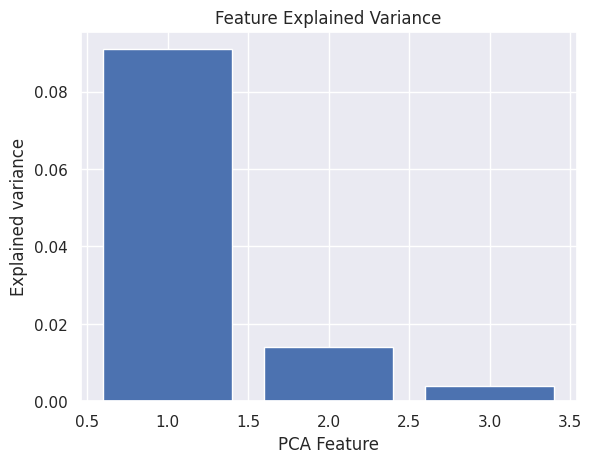

In [99]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
sns.set()
 
pca = PCA(n_components=3)
x_features = data.drop(columns=['source'])
# Fit and transform data
pca.fit_transform(x_features)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

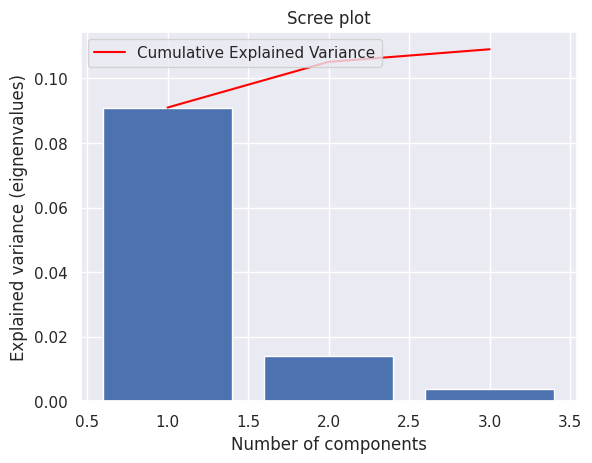

In [94]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
pca = PCA(n_components=3)
# Fit and transform data
reduced_features = pca.fit_transform(x_features)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [90]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_features)
 
print('Shape before PCA: ', x_features.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2']).join(data['source'])

pca_df

Shape before PCA:  (14474, 6)
Shape after PCA:  (14474, 2)


,PC1,PC2,source
0,0.524875,0.004229,Manga
1,0.516616,-0.022105,Manga
2,0.442422,-0.005229,Manga
3,0.481120,-0.062769,Original
4,0.536348,-0.097512,Manga
...,...,...,...
14469,-0.438316,-0.074982,Unknown
14470,-0.445426,0.017300,Unknown
14471,-0.190819,0.584160,Other
14472,-0.471054,-0.138220,Other


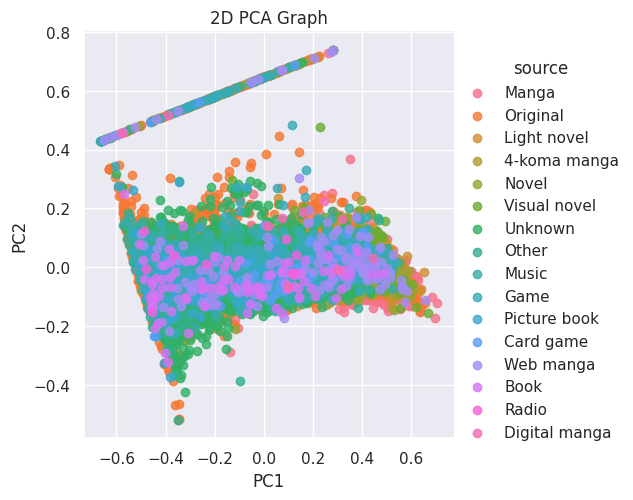

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='source', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [92]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = data.columns.drop('source').to_list()
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
episodes,0.003549,-0.018000
score,0.306767,-0.950167
scored_by,0.061159,-0.015129
popularity,-0.946097,-0.310394
members,0.081981,-0.011969
favorites,0.017915,-0.011892


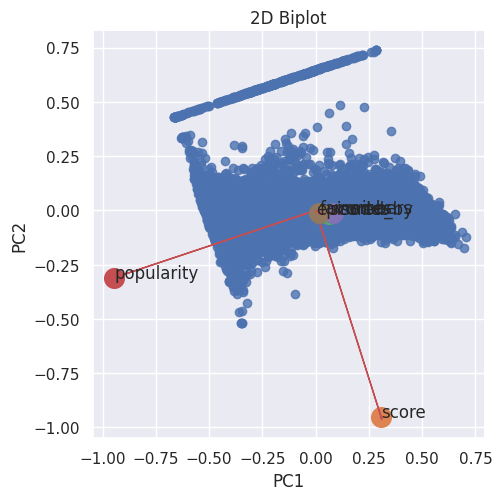

In [93]:
# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()

Most informative features seem to be popularity and score. Let's do PCA for only those features.

Shape before PCA:  (14474, 6)
Shape after PCA:  (14474, 2)


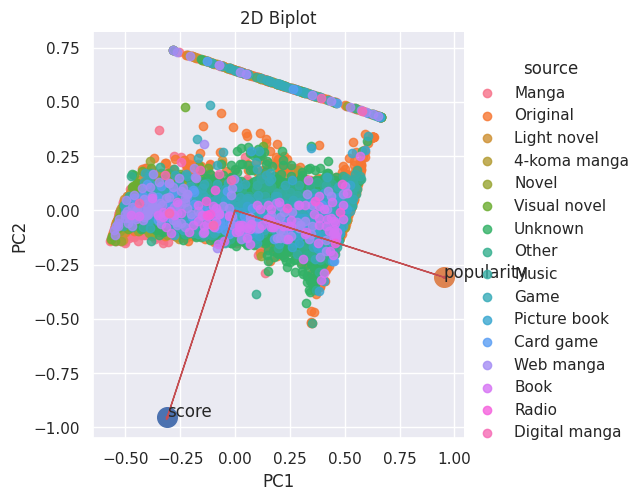

In [103]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_features[['score', 'popularity']])
 
print('Shape before PCA: ', x_features.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2']).join(data['source'])

pca_df

# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = x_features[['score', 'popularity']].columns.to_list()
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='source', 
    fit_reg=False, 
    legend=True
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()